In [2]:
import os
import pandas as pd
import glob
current_directory = os.path.join('/opt', 'home', 's3934056')
results_directory_path = os.path.join(current_directory, 'results', 'metric', 'KMeans','2.0.5', '**', '**', 'drift_results_v4.csv')
results_directory_path

'/opt\\home\\s3934056\\results\\metric\\KMeans\\2.0.5\\**\\**\\drift_results_v4.csv'

In [3]:
results_directory_path = r'../results/metrics/KMeans/2.0.5/**/**/drift_results_v4.csv'
# Use glob to find all CSV files matching the pattern
csv_files = glob.glob(results_directory_path, recursive=True)
print(len(csv_files))

33


In [4]:
# Use glob to find all CSV files matching the pattern
csv_files = glob.glob(results_directory_path, recursive=True)
    
# Read each CSV file into a pandas DataFrame and store them in a list
dataframes = [pd.read_csv(file) for file in csv_files]
    
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)
    
# Save the combined DataFrame to a new CSV file
combined_df.to_csv(f'KMeans_drift_combined_results.csv', index=False)

In [5]:
# Read the combined CSV into a DataFrame
df = pd.read_csv(f'KMeans_drift_combined_results.csv')



# Data Overview
print(df.describe())

       Training Time  Prediction Time          AMI          ARI  \
count    1485.000000      1485.000000  1485.000000  1485.000000   
mean       11.244122         0.004360     0.906247     0.828678   
std        21.467756         0.010167     0.077133     0.149323   
min         0.144851         0.000740     0.751311     0.478573   
25%         0.175106         0.000763     0.830952     0.696662   
50%         0.188966         0.000827     0.909197     0.844941   
75%         8.203545         0.001737     0.983290     0.974380   
max        62.881626         0.052232     1.000000     1.000000   

       Calinski-Harabasz Score  Davies-Bouldin Score  Completeness Score  \
count              1485.000000           1485.000000         1485.000000   
mean              24908.344748              0.465254            0.921218   
std               45311.357749              0.199014            0.065399   
min                 236.186836              0.036494            0.766796   
25%             

In [6]:
df.head()

,Timestamp,Dataset,Clustering Algorithm,Algorithm Details,Drift Type,Drift Level,Training Time,Prediction Time,AMI,ARI,...,Davies-Bouldin Score,Completeness Score,Fowlkes-Mallows Score,Homogeneity,Completeness,V-Measure,Mutual Information,Normalized Mutual Information,Silhouette Score,Accuracy
0,2024-04-04 08:44:59.708140,a1,KMeans,"{'algorithm': 'full', 'copy_x': True, 'init': ...",Gaussian Shift,MILD,0.295866,0.000962,0.775203,0.617247,...,0.689637,0.803839,0.637926,0.788772,0.803839,0.796234,2.359202,0.796234,0.485398,0.760000
1,2024-04-04 08:45:00.093164,a1,KMeans,"{'algorithm': 'full', 'copy_x': True, 'init': ...",Gaussian Shift,MILD,0.346694,0.000951,0.790746,0.626101,...,0.655282,0.817955,0.646424,0.802915,0.817955,0.810365,2.401505,0.810365,0.499346,0.766667
2,2024-04-04 08:45:00.464935,a1,KMeans,"{'algorithm': 'full', 'copy_x': True, 'init': ...",Gaussian Shift,MILD,0.338029,0.000857,0.772728,0.615093,...,0.686570,0.800924,0.635692,0.787237,0.800924,0.794021,2.354610,0.794021,0.461189,0.765333
3,2024-04-04 08:45:00.837694,a1,KMeans,"{'algorithm': 'full', 'copy_x': True, 'init': ...",Gaussian Shift,MILD,0.338933,0.000969,0.795980,0.650021,...,0.657124,0.818563,0.667930,0.811703,0.818563,0.815119,2.427788,0.815119,0.497428,0.808000
4,2024-04-04 08:45:01.208097,a1,KMeans,"{'algorithm': 'full', 'copy_x': True, 'init': ...",Gaussian Shift,MILD,0.336610,0.000977,0.803578,0.669799,...,0.664151,0.824880,0.686591,0.819135,0.824880,0.821998,2.450019,0.821998,0.496672,0.818667


In [7]:
# Define drift types and levels
drift_types = ['Knock-out', 'Gaussian Shift', 'Concept Drift']
drift_levels = ['MILD', 'MODERATE', 'SEVERE']

cache_file_path  = '../cache/2.0.5/'

# Iterate over drift types and levels
for drift_type in drift_types:
    for drift_level in drift_levels:
        # Filter the DataFrame for the current drift type and level
        filtered_data = df[(df['Drift Type'] == drift_type) & (df['Drift Level'] == drift_level)]
        
        
        # Save the filtered data to a CSV file
        file_name = cache_file_path + f"filtered_data_{drift_type}_{drift_level}.csv"
        filtered_data.to_csv(file_name, index=False)

In [8]:
csv_files = glob.glob(cache_file_path + '/*.csv' , recursive=True)
len(csv_files)

9

In [9]:
# Specify the columns for which to calculate the mean
metrics_columns = ['Training Time', 'Prediction Time', 'AMI', 'ARI', 'Calinski-Harabasz Score', 
                   'Davies-Bouldin Score', 'Completeness Score', 'Fowlkes-Mallows Score', 
                   'Homogeneity', 'Completeness', 'V-Measure', 'Mutual Information', 
                   'Normalized Mutual Information', 'Silhouette Score', 'Accuracy']

../cache/2.0.5\filtered_data_Concept Drift_MILD.csv


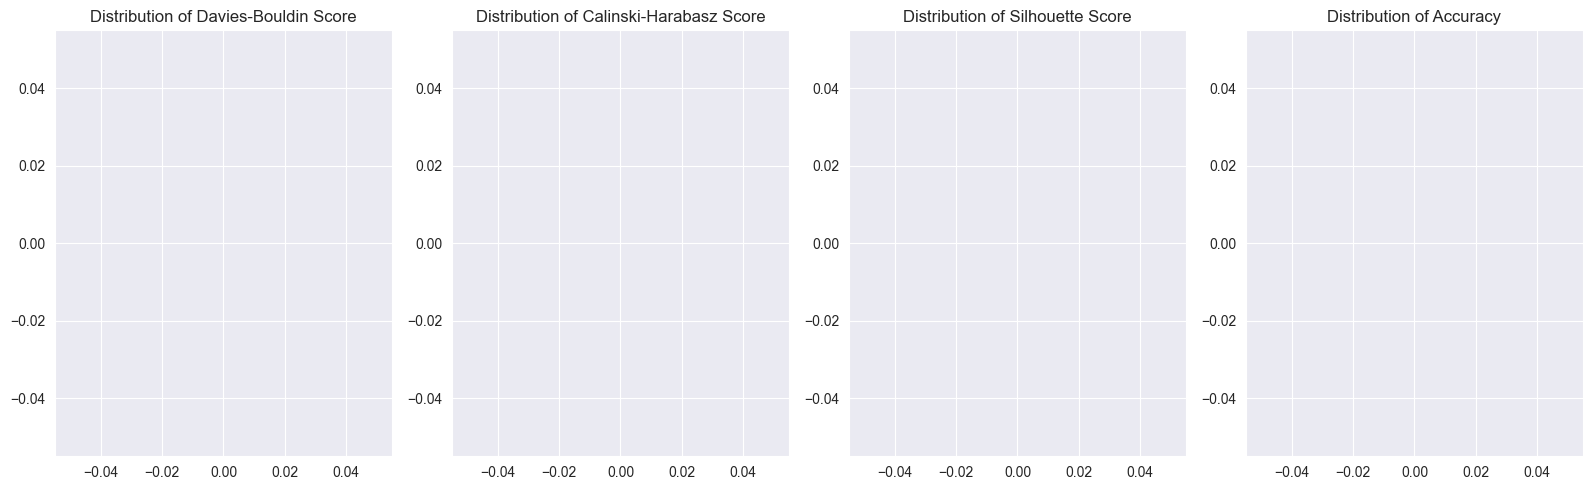

../cache/2.0.5\filtered_data_Concept Drift_MODERATE.csv


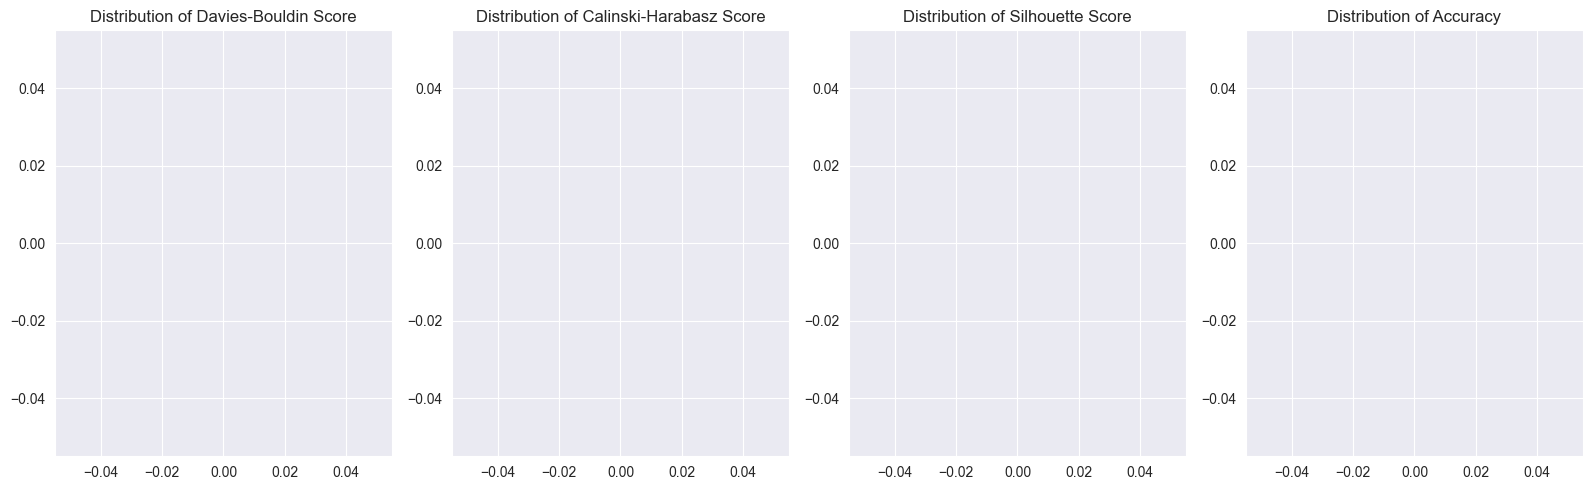

../cache/2.0.5\filtered_data_Concept Drift_SEVERE.csv


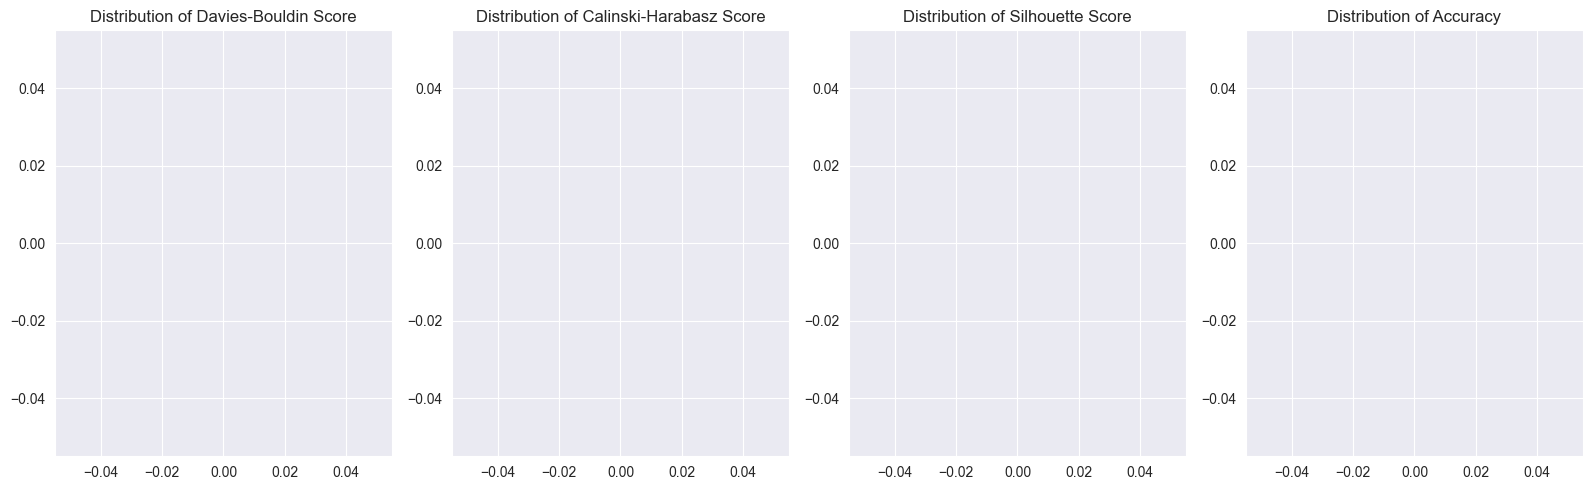

../cache/2.0.5\filtered_data_Gaussian Shift_MILD.csv


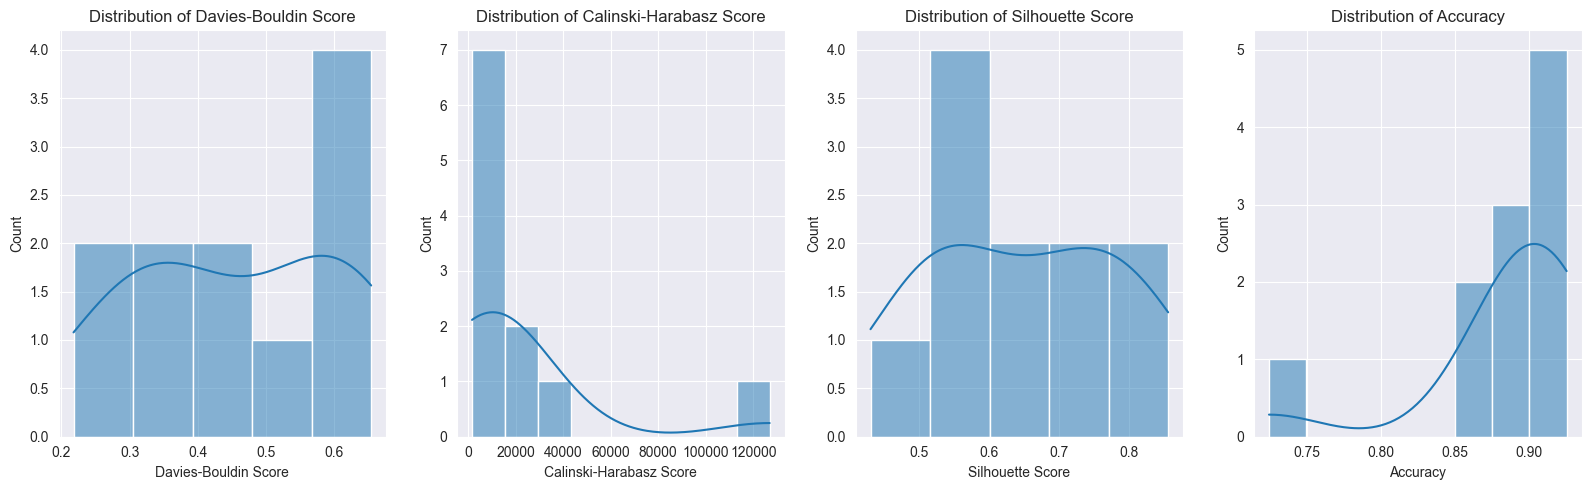

../cache/2.0.5\filtered_data_Gaussian Shift_MODERATE.csv


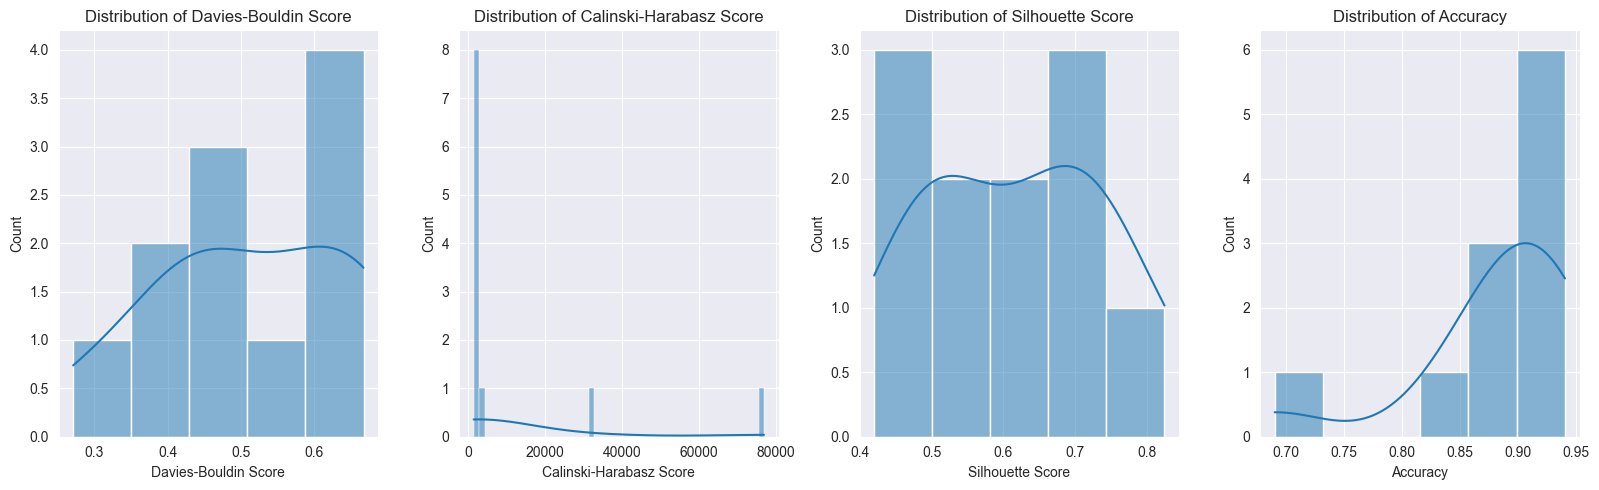

../cache/2.0.5\filtered_data_Gaussian Shift_SEVERE.csv


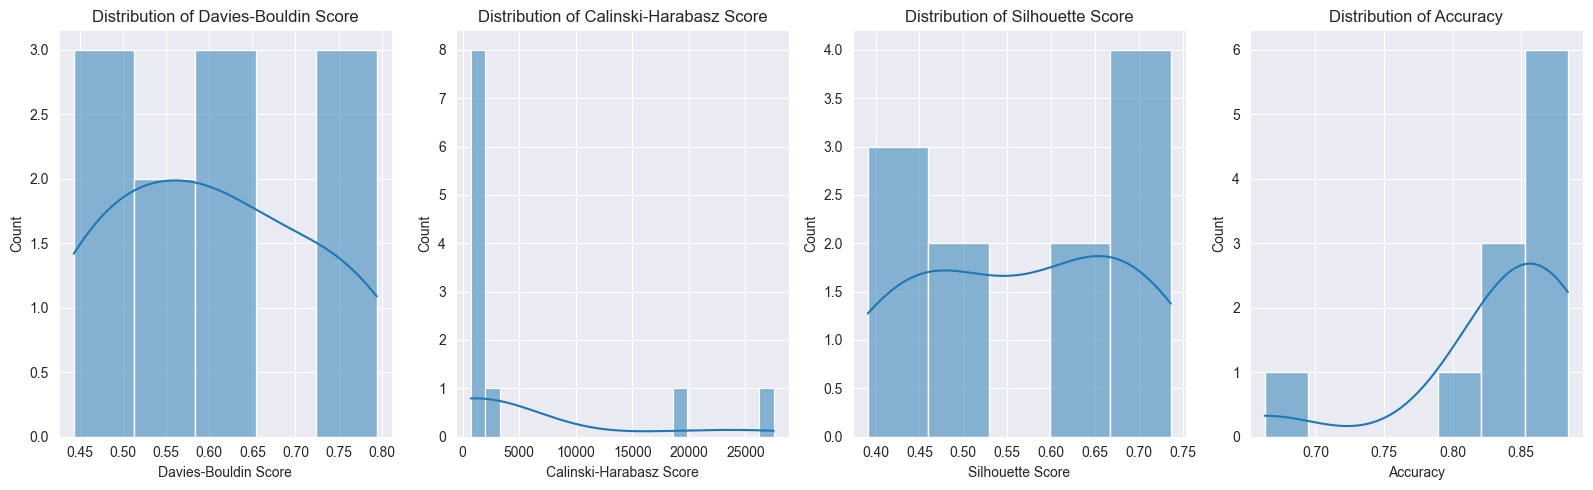

../cache/2.0.5\filtered_data_Knock-out_MILD.csv


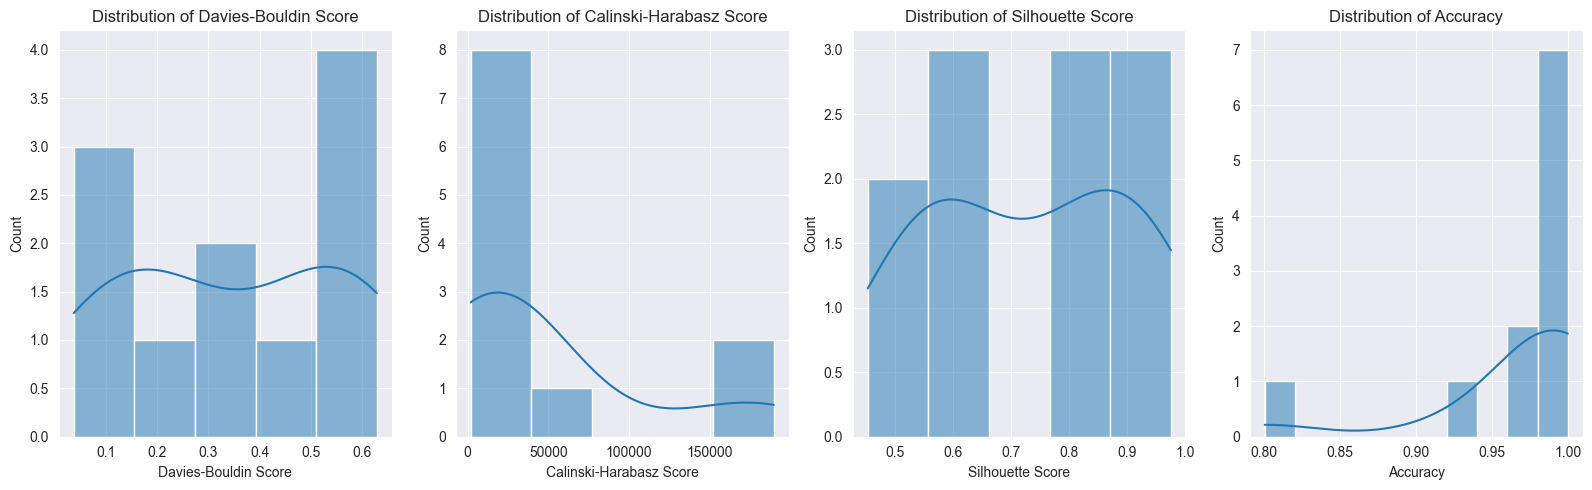

../cache/2.0.5\filtered_data_Knock-out_MODERATE.csv


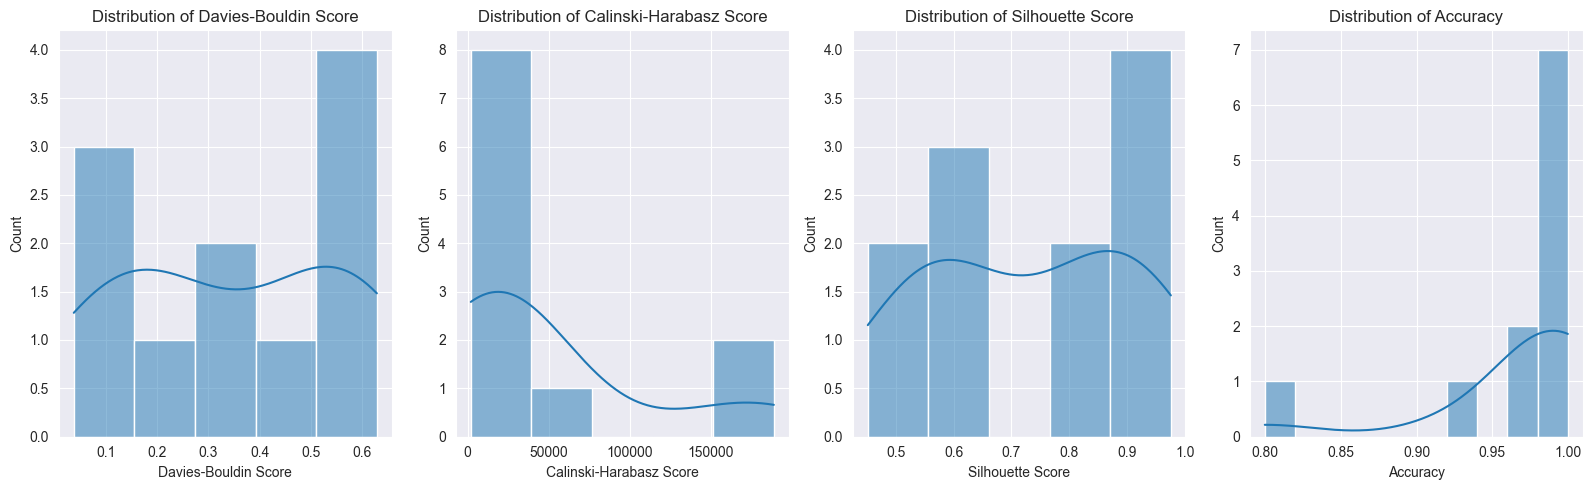

../cache/2.0.5\filtered_data_Knock-out_SEVERE.csv


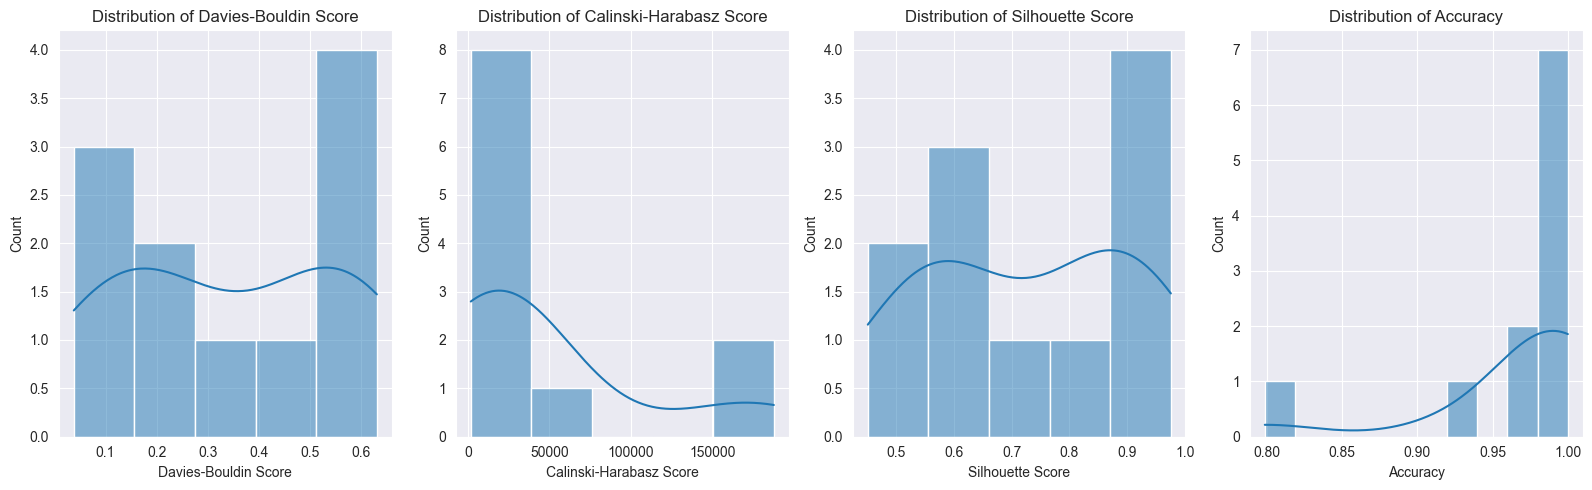

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

for file in csv_files:
    df = pd.read_csv(file)
    # print()
    print(file)
    # # Group the data by the "Dataset" column and calculate the mean of each metric
    df = df.groupby("Dataset")[metrics_columns].mean()
    # 
    # print(mean_metrics.describe())
        # Performance Metrics Distribution
    metrics = ['Davies-Bouldin Score', 'Calinski-Harabasz Score', 'Silhouette Score', 'Accuracy']
    plt.figure(figsize=(20, 5))
    for i, metric in enumerate(metrics, 1):
        plt.subplot(1, 5, i)
        sns.histplot(df[metric], kde=True)
        plt.title(f'Distribution of {metric}')
    plt.tight_layout()
    plt.show()
    
    # # Correlation Analysis
    # correlation_matrix = df[metrics].corr()
    # plt.figure(figsize=(8, 6))
    # sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    # plt.title('Correlation between Metrics')
    # plt.show()

In [11]:
pd.set_option('display.width', 1000)
for file in csv_files:
    df = pd.read_csv(file)
    # print()
    print(file)
    # # Group the data by the "Dataset" column and calculate the mean of each metric
    df = df.groupby("Dataset")[metrics_columns].mean()
    # 
    print(df[['Davies-Bouldin Score', 'Calinski-Harabasz Score', 'Silhouette Score', 'Accuracy']].describe())

../cache/2.0.5\filtered_data_Concept Drift_MILD.csv
       Davies-Bouldin Score Calinski-Harabasz Score Silhouette Score Accuracy
count                     0                       0                0        0
unique                    0                       0                0        0
top                     NaN                     NaN              NaN      NaN
freq                    NaN                     NaN              NaN      NaN
../cache/2.0.5\filtered_data_Concept Drift_MODERATE.csv
       Davies-Bouldin Score Calinski-Harabasz Score Silhouette Score Accuracy
count                     0                       0                0        0
unique                    0                       0                0        0
top                     NaN                     NaN              NaN      NaN
freq                    NaN                     NaN              NaN      NaN
../cache/2.0.5\filtered_data_Concept Drift_SEVERE.csv
       Davies-Bouldin Score Calinski-Harabasz Score Silhou